In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno

# Veri setini yükle
df = pd.read_csv("netflix_titles_2021.csv")

In [2]:
df0=df.copy() #df0 a orjinal datayı kopya yaparak işlemlere kopya data setinden devam edeceğiz. Bu sayede yapılacak değişiklikler orjinal datayı etkilemeyecek.
df0

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.head() # ilk 5 satıra bakmak

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.tail() # son 5 satıra bakmak

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
df.sample(5) # datayı gözden geçirmek için karışık 5(istediğin kadar sayı yazabilirsin) satırı inceledik. bu satırı birkaç defa çalıştırdık.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4261,s4262,TV Show,Way Back into Love,NaN,"June Tsai, Ray Chang, Lung Shao-hua, Yi-Wen Ye...",Taiwan,"December 24, 2018",2011,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","After years in the U.S., a Taiwanese immigrant..."
2978,s2979,Movie,Kevin Hart: I'm a Grown Little Man,Shannon Hartman,Kevin Hart,United States,"January 30, 2020",2009,TV-MA,62 min,Stand-Up Comedy,Stand-up comedy star Kevin Hart delivers his u...
5940,s5941,TV Show,Breaking Bad,NaN,"Bryan Cranston, Aaron Paul, Anna Gunn, Dean No...",United States,"August 2, 2013",2013,TV-MA,5 Seasons,"Crime TV Shows, TV Dramas, TV Thrillers",A high school chemistry teacher dying of cance...
6543,s6544,Movie,"Crouching Tiger, Hidden Dragon",Ang Lee,"Chow Yun Fat, Michelle Yeoh, Zhang Ziyi, Chang...","Taiwan, Hong Kong, United States, China","March 1, 2019",2000,PG-13,120 min,"Action & Adventure, International Movies, Roma...",A young woman in ancient China longs for an ad...
5546,s5547,Movie,Five Nights in Maine,Maris Curran,"David Oyelowo, Dianne Wiest, Rosie Perez, Teyo...",United States,"April 1, 2017",2015,TV-MA,83 min,"Dramas, Independent Movies","After his wife dies in a car accident, a grief..."


In [7]:
df.info() # data setine genel bir bakış
# örneğin data setinde type sütununda boş değer yok fakat cast sütunun sadece 7982 satırında değer var yani 825 satır boş.
#sadece release_year sütunu int, diğer sütunların içeriğine bakıp nümeric olan sütunların içeriği ve type değiştirilmeli.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.shape # satır ve sütun değerlerine bakmak. çıktı şu şekilde = (satır sayısı , sütun sayısı)

(8807, 12)

In [9]:
df.columns # sütun isimlerine bakmak. Sütun isimlerinde bize problem çıkaracak harf boyutu veya noktalama işareti olmadığından değiştirmeye gerek olmayabilir

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [10]:
df.isnull() # datanın tamamında nan değer var mı bakıyoruz fakat bu yöntem tüm satırları ve sütunları döndürür.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum() # sütun bazında non değerlerin toplamını gözlemek


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
# Director sütununda boş değerler var fakat nunique satırında baktığımızda çok fazla yönetmen olduğu için bir çıkarım yapmak ergonomik olmaz 


In [13]:
df.nunique() # sütun bazında unique değer yani bir daha tekrar etmeyen değerleri görmek.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [14]:
df.rating.unique() #sütunlar değerlendirilirken bu şekilde değerlere bakmanın uygun olacağı düşünülüyor.

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [15]:
df.duplicated() # satır bazında tekrar eden değer var mı diye bakar.isim olarak tekrar eden sütun olmadığını görüyoruz.ancak sütun değerlerine de bakarak aynı işleve sahip sütun var mı kontrol edilmeli.

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [16]:
df.duplicated().sum() # tekrar eden değerlerin toplamına bakar ve bu data da tekrar eden değer yok

0

In [17]:
df.describe() # sadece int sütunların değerlerini gösterir

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [18]:
df.describe(include='object') # str verilerinde istatiksel değerlerini gösterir


,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [19]:
# Eksik değerlerin her sütunda toplam ve oran olarak gösterilmesi
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

              Missing Values  Percentage
director                2634   29.908028
country                  831    9.435676
cast                     825    9.367549
date_added                10    0.113546
rating                     4    0.045418
duration                   3    0.034064
show_id                    0    0.000000
type                       0    0.000000
title                      0    0.000000
release_year               0    0.000000
listed_in                  0    0.000000
description                0    0.000000


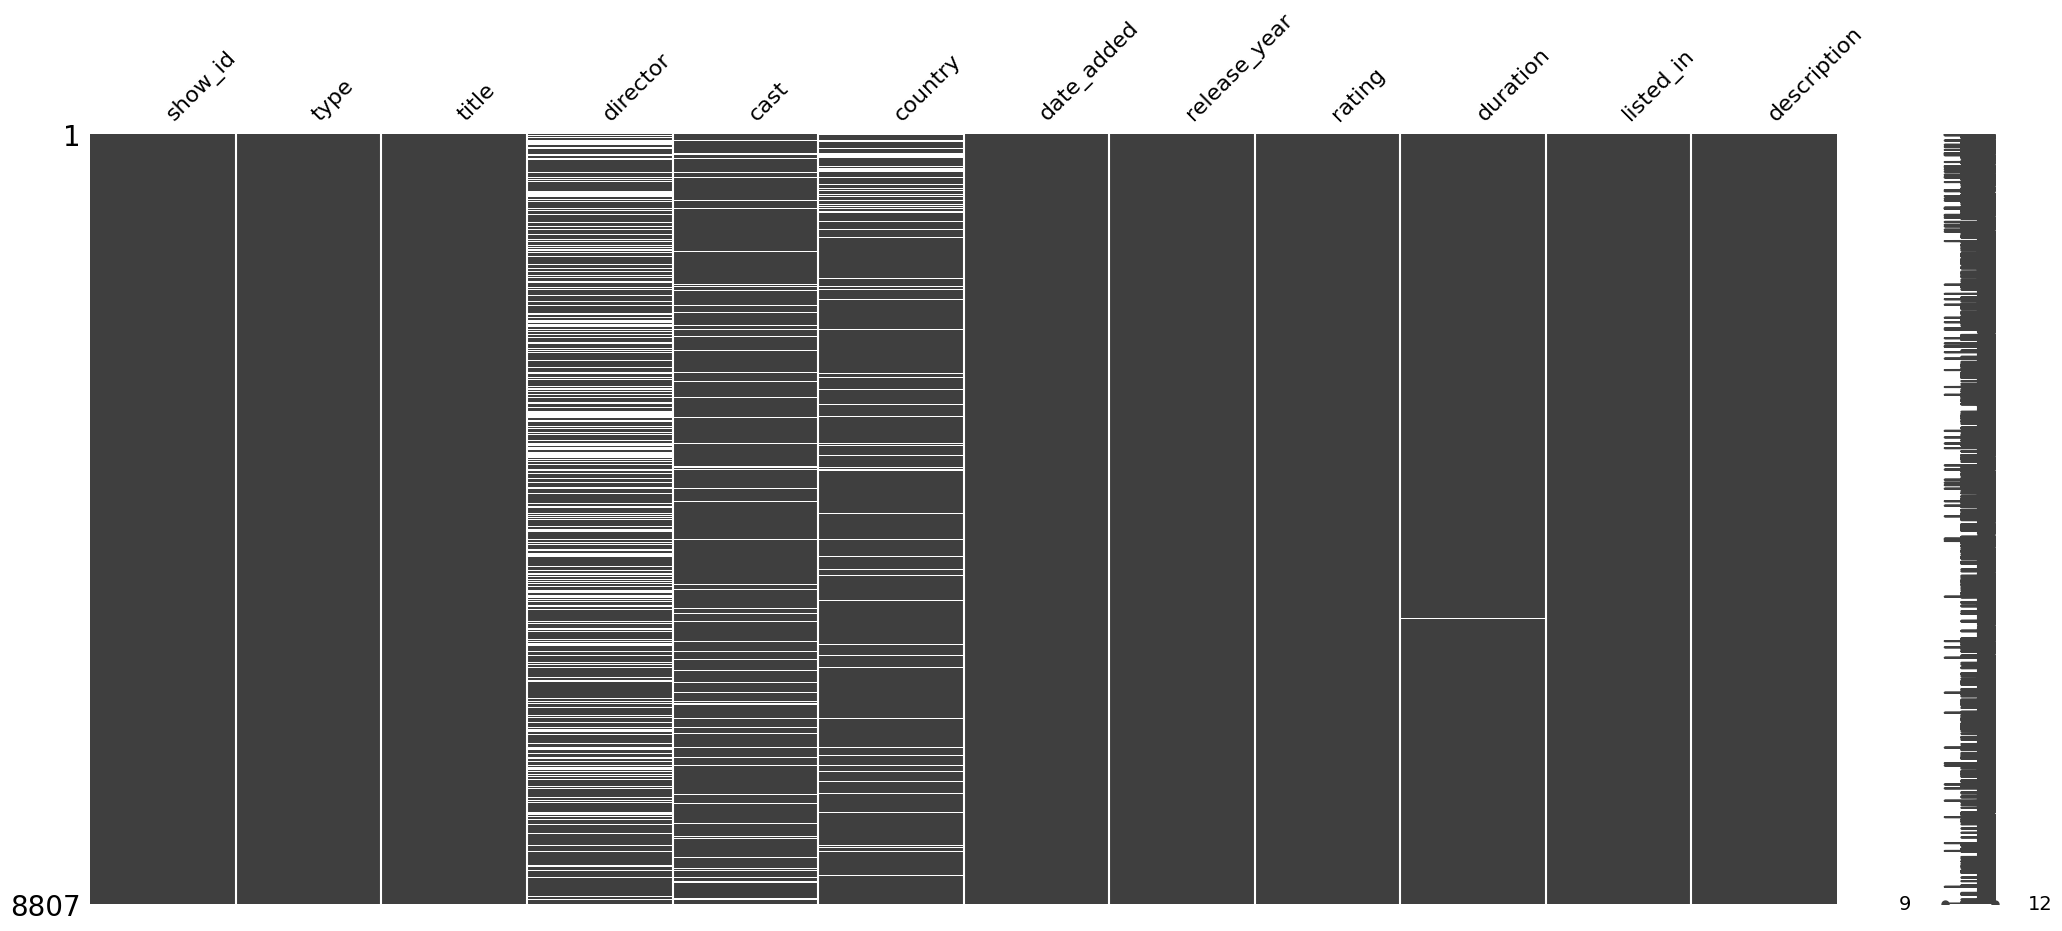

In [20]:
msno.matrix(df);

In [21]:
modes = df.mode().iloc[0]
modes
# Her sütundaki en sık tekrar eden değeri (mod) bulma

show_id                                                        s1
type                                                        Movie
title                                                      #Alive
director                                            Rajiv Chilaka
cast                                           David Attenborough
country                                             United States
date_added                                        January 1, 2020
release_year                                               2018.0
rating                                                      TV-MA
duration                                                 1 Season
listed_in                            Dramas, International Movies
description     Paranormal activity at a lush, abandoned prope...
Name: 0, dtype: object

In [22]:
modes = df.mode().iloc[0]
mode_counts = df.apply(lambda x: x.value_counts().max())
mode_counts
# yukarıda baktığımız tekrar eden değerlerin ne kadar tekrar ettiğini görüyoruz
# örneğin type sütununda movie ismi 6131 adet var

show_id            1
type            6131
title              1
director          19
cast              19
country         2818
date_added       109
release_year    1147
rating          3207
duration        1793
listed_in        362
description        4
dtype: int64

In [23]:
# IQR hesaplayarak aykırı değerleri tespit etme
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerleri bulma
outliers = df[(df['release_year'] < (Q1 - 1.5 * IQR)) | (df['release_year'] > (Q3 + 1.5 * IQR))]
print(f"Outliers in 'release_year': \n{outliers}")

Outliers in 'release_year': 
     show_id   type              title          director  \
7         s8  Movie            Sankofa      Haile Gerima   
22       s23  Movie    Avvai Shanmughi    K.S. Ravikumar   
24       s25  Movie              Jeans        S. Shankar   
26       s27  Movie     Minsara Kanavu       Rajiv Menon   
41       s42  Movie               Jaws  Steven Spielberg   
...      ...    ...                ...               ...   
8764   s8765  Movie         Wyatt Earp   Lawrence Kasdan   
8766   s8767  Movie                XXx         Rob Cohen   
8768   s8769  Movie  Y Tu Mamá También    Alfonso Cuarón   
8770   s8771  Movie            Yaadein      Subhash Ghai   
8792   s8793  Movie        Young Tiger            Mu Chu   

                                                   cast  \
7     Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
22    Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...   
24    Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...   
26    Arvind S

In [24]:
# Aykırı yılların dağılımını incele
outlier_years = outliers['release_year'].value_counts()
print(outlier_years)

release_year
2003    61
2002    51
2001    45
1999    39
1997    38
2000    37
1998    36
1993    28
1995    25
1996    24
1992    23
1994    22
1990    22
1988    18
1982    17
1991    17
1989    16
1981    13
1986    13
1984    12
1979    11
1980    11
1983    11
1973    10
1985    10
1976     9
1987     8
1978     7
1975     7
1974     7
1977     7
1971     5
1972     5
1967     5
1945     4
1960     4
1962     3
1968     3
1955     3
1944     3
1943     3
1958     3
1963     2
1956     2
1969     2
1954     2
1964     2
1965     2
1946     2
1942     2
1970     2
1925     1
1966     1
1959     1
1961     1
1947     1
Name: count, dtype: int64


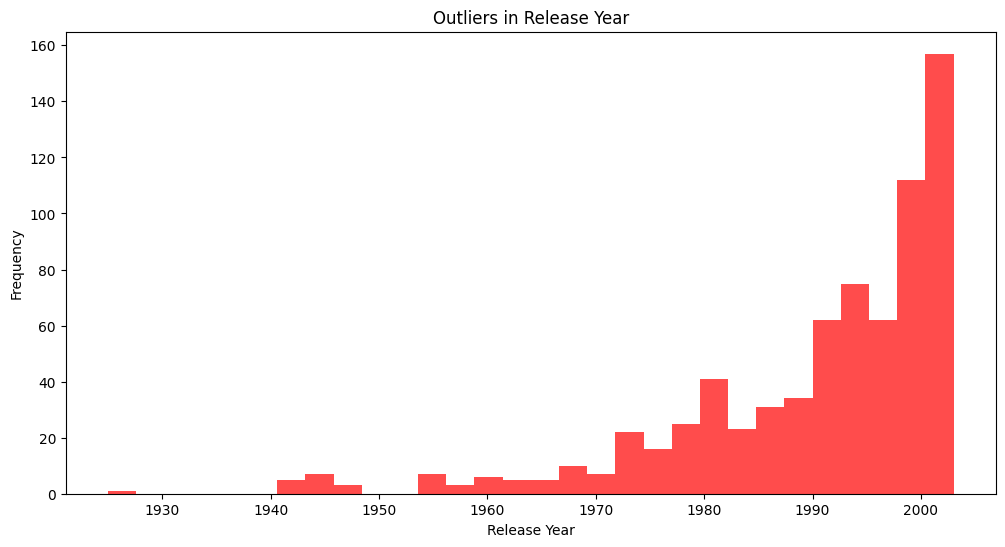

In [25]:
import matplotlib.pyplot as plt

# Aykırı yılların bir dağılım grafiği
plt.figure(figsize=(12, 6))
plt.hist(outliers['release_year'], bins=30, color='red', alpha=0.7)
plt.title('Outliers in Release Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

# Aşağıdaki grafik aykırı değerin en solda (1930) yıllarında oluğunu, film sektörünün artan yıllarda gelişme gösterdiğini, grafiğin en başında ve en solunda aykırı değer olduğunu
# grafik ortalama değerlerin 60 - 70 bantlarında, medyanın ise 40 - 50 bantlarında oludğu görüldüğünde grafiğin en başında ve en solunda aykırı değerlerin olduğu rahatlıkla tespit edilrbilir.

## Eksik Verileri Doldurma

Veri setindeki eksik değerlerin hangi sütunlarda olduğunu belirledikten sonra, aşağıdaki stratejilerden birini ya da birkaçını kullanabiliriz:

1. Kategorik Veriler İçin: En yaygın değerle (mode) ya da belirli bir sabit değerle doldurabiliriz.
2. Sayısal Veriler İçin: Ortalama (mean), medyan (median) veya interpolasyon ile doldurabiliriz.
3. Metinsel Veriler İçin: Unknown, Not Available, gibi belirli bir sabit değerle doldurabiliriz.


In [26]:
# director ( yönetmen) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['director'] = df['director'].fillna('Unknown')
df.director.value_counts()

director
Unknown                           2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

In [27]:
# cast (oyuncular) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['cast'] = df['cast'].fillna('Unknown')
df.cast.value_counts()

cast
Unknown                                                                                                                                                                                       825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                        14
Samuel West                                                                                                                                                                                    10
Jeff Dunham                                                                                                                                                                                     7
                         

In [28]:
# country (ülke) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['country'] = df['country'].fillna('Unknown')
df.country.value_counts()

country
United States                             2818
India                                      972
Unknown                                    831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [29]:
# date_added (eklenme tarihi) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['date_added'] = df['date_added'].fillna('Unknown')
df.date_added.value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1768, dtype: int64

In [30]:
# rating sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['rating'] = df['rating'].fillna('Unknown')
df.rating.value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
Unknown        4
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [31]:
# duration (süre) sütunundaki eksik (NaN) değerleri 'Unknown' ile dolduralım

df['duration'] = df['duration'].fillna('Unknown')
df.duration.value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [32]:
# Tarih Örneği "January 8, 2018" 
# Bu yüzden başında sonunda boşluk varsa siliyoruz ve Ay ın ilk harfini büyük yapıyoruz.
df['date_added'] = df['date_added'].str.strip().str.title()

In [33]:
# Tarih sütununu gün, ay, yıl olarak ayırma
# Tarih Örneği "January 8, 2018" ne uyan format = format="%B %d, %Y"
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce') 

df['year'] = df['date_added'].dt.year.fillna(0).astype(int)
df['month'] = df['date_added'].dt.month.fillna(0).astype(int)
df['day'] = df['date_added'].dt.day.fillna(0).astype(int)

In [34]:
df['season'] = df['month'].apply(lambda x: 
                                 "winter" if x in [12, 1, 2] else 
                                 "spring" if x in [3, 4, 5] else 
                                 "summer" if x in [6, 7, 8] else 
                                 "autumn")

In [35]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season
5402,s5403,Movie,The Invisible Guest,Paulo Oriol,"Mario Casas, Ana Wagener, José Coronado, Bárba...",Spain,2017-07-01,2016,TV-14,106 min,"International Movies, Thrillers",After waking next to his now-dead lover in a h...,2017,7,1,summer
917,s918,Movie,Framing John DeLorean,"Don Argott, Sheena M. Joyce","Alec Baldwin, Josh Charles, Morena Baccarin, D...",United States,2021-05-05,2019,TV-MA,109 min,"Documentaries, Dramas",From his rise in the auto industry to his fall...,2021,5,5,spring
7962,s7963,Movie,Scream 3,Wes Craven,"David Arquette, Neve Campbell, Courteney Cox, ...",United States,2019-07-01,2000,R,117 min,Horror Movies,This installment of the tongue-in-cheek horror...,2019,7,1,summer
196,s197,Movie,He's All That,Mark Waters,"Addison Rae, Tanner Buchanan, Rachael Leigh Co...",Unknown,2021-08-27,2021,TV-14,92 min,"Comedies, Romantic Movies",An influencer specializing in makeovers bets s...,2021,8,27,summer
2061,s2062,Movie,Barbie Princess Adventure,Conrad Helten,"America Young, Erica Lindbeck, Ritesh Rajan, D...",Netherlands,2020-09-01,2020,TV-Y,72 min,"Children & Family Movies, Music & Musicals","Through music and magic, Barbie learns what it...",2020,9,1,autumn
6723,s6724,Movie,Expo,Joseph Mbah,"Derek Davenport, Amelia Haberman, Shepsut Wils...",United States,2019-08-29,2019,TV-14,81 min,"Action & Adventure, Dramas, Independent Movies","Mistakenly accused of kidnapping, a veteran so...",2019,8,29,summer
6561,s6562,Movie,Danny Says,Brendan Toller,"Danny Fields, Iggy Pop, Alice Cooper, Judy Col...",United States,2017-03-02,2015,TV-MA,103 min,"Documentaries, Music & Musicals",This documentary profiles eccentric publicist ...,2017,3,2,spring
7930,s7931,Movie,San Pietro,John Huston,Unknown,United States,2017-03-31,1945,TV-14,32 min,"Classic Movies, Documentaries","After the Allies invade Italy, the Liri Valley...",2017,3,31,spring
1945,s1946,Movie,Manorama Six Feet Under,Navdeep Singh,"Abhay Deol, Gul Panag, Raima Sen, Sarika, Kulb...",India,2020-09-28,2007,TV-14,129 min,"Dramas, International Movies, Thrillers",A government employee and aspiring crime write...,2020,9,28,autumn
7225,s7226,Movie,Kraftidioten,Hans Petter Moland,"Stellan Skarsgård, Pål Sverre Hagen, Bruno Gan...","Norway, Denmark, Sweden",2017-01-05,2014,TV-MA,117 min,"Comedies, International Movies, Thrillers","When he sets out to avenge his son's murder, m...",2017,1,5,winter


In [36]:
# duration sütunundaki verilerin bir kısmı "X min" (dakika cinsinden) ve bir kısmı "X Seasons" (sezon sayısı) olarak girilmiş. 
# Bu durumda, iki farklı veri türüyle karşı karşıyayız:

# Dakika Cinsinden Süre (min): Filmler için kullanılıyor.
# Sezon Sayısı (Seasons): Diziler için kullanılıyor.

In [37]:
# 1. Veri Türlerini Ayırma
# İlk olarak, film ve dizi verilerini ayrı sütunlara ayırabiliriz.

# 'min' içeren değerler için yeni bir sütun
df['duration_minutes'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in str(x) else np.nan)

# 'Seasons' içeren değerler için yeni bir sütun
df['duration_seasons'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'Season' in str(x) else np.nan)

In [38]:
# 2. Eksik Değerleri Doldurma
# Eksik olan dakikaları veya sezon sayısını tahmin edebilir ya da eksik veriler için belirli bir sabit değer kullanabiliriz.

# Dakika cinsinden süreyi ortalama ile doldurma (eğer sayı olarak boşsa)

flt1 = [i == "Movie" for i in df.loc[:, "type"]]
df.loc[flt1, 'duration_minutes'] = df.loc[flt1, 'duration_minutes'].fillna(df.loc[flt1, 'duration_minutes'].mean())

# Sezon sayısını mod (en yaygın değer) ile doldurma (eğer sayı olarak boşsa)
flt2 = [i == "TV Show" for i in df.loc[:, "type"]]
df.loc[flt2, 'duration_seasons'] = df.loc[flt2, 'duration_seasons'].fillna(df.loc[flt2, 'duration_seasons'].mode()[0])

In [48]:
df.loc[:, 'duration_minutes'].value_counts()

duration_minutes
90.0     152
94.0     146
93.0     146
97.0     146
91.0     144
        ... 
16.0       1
8.0        1
9.0        1
208.0      1
191.0      1
Name: count, Length: 206, dtype: int64

In [39]:
df.loc[:, 'duration_seasons'].value_counts()

duration_seasons
1.0     1793
2.0      425
3.0      199
4.0       95
5.0       65
6.0       33
7.0       23
8.0       17
9.0        9
10.0       7
13.0       3
15.0       2
12.0       2
11.0       2
17.0       1
Name: count, dtype: int64

In [40]:
# 3. Orijinal 'duration' Sütununu Temizleme
# Orijinal duration sütununu, yeni oluşturulan duration_minutes ve duration_seasons sütunları ile değiştirebiliriz.

# 'duration' sütununu yeni oluşturulan sütunlara göre güncelleme
# Film ve dizi ayırma ve duration sütununu yeniden düzenleme
df['duration'] = df.apply(lambda row: f"{int(row['duration_minutes'])} min" if row['type'] == 'Movie' 
                        else f"{int(row['duration_seasons'])} Seasons", axis=1)

In [41]:
df[['title', 'duration', 'duration_minutes', 'duration_seasons']].head(5)

,title,duration,duration_minutes,duration_seasons
0,Dick Johnson Is Dead,90 min,90.0,NaN
1,Blood & Water,2 Seasons,NaN,2.0
2,Ganglands,1 Seasons,NaN,1.0
3,Jailbirds New Orleans,1 Seasons,NaN,1.0
4,Kota Factory,2 Seasons,NaN,2.0


## Veri Temizleme

In [42]:
# 1. Tekrar eden satırları silme:
# Eğer aynı film birden fazla kez eklenmişse, bunları silebiliriz.

df = df.drop_duplicates()

In [43]:
# 2. Gereksiz boşlukları temizleme:
# Bazı metinlerin başında veya sonunda gereksiz boşluklar olabilir. Bunları temizleyelim.

df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['cast'] = df['cast'].str.strip()
df['country'] = df['country'].str.strip()

## Eksik Veri için Son Kontrol

In [44]:
# Son kontrol:
# Tüm bu işlemlerden sonra, tekrar eksik veri kontrolü yapalım.

last_df_missing = df.isnull().sum()
last_df_missing

show_id                0
type                   0
title                  0
director               0
cast                   0
country                0
date_added            10
release_year           0
rating                 0
duration               0
listed_in              0
description            0
year                   0
month                  0
day                    0
season                 0
duration_minutes    2676
duration_seasons    6131
dtype: int64

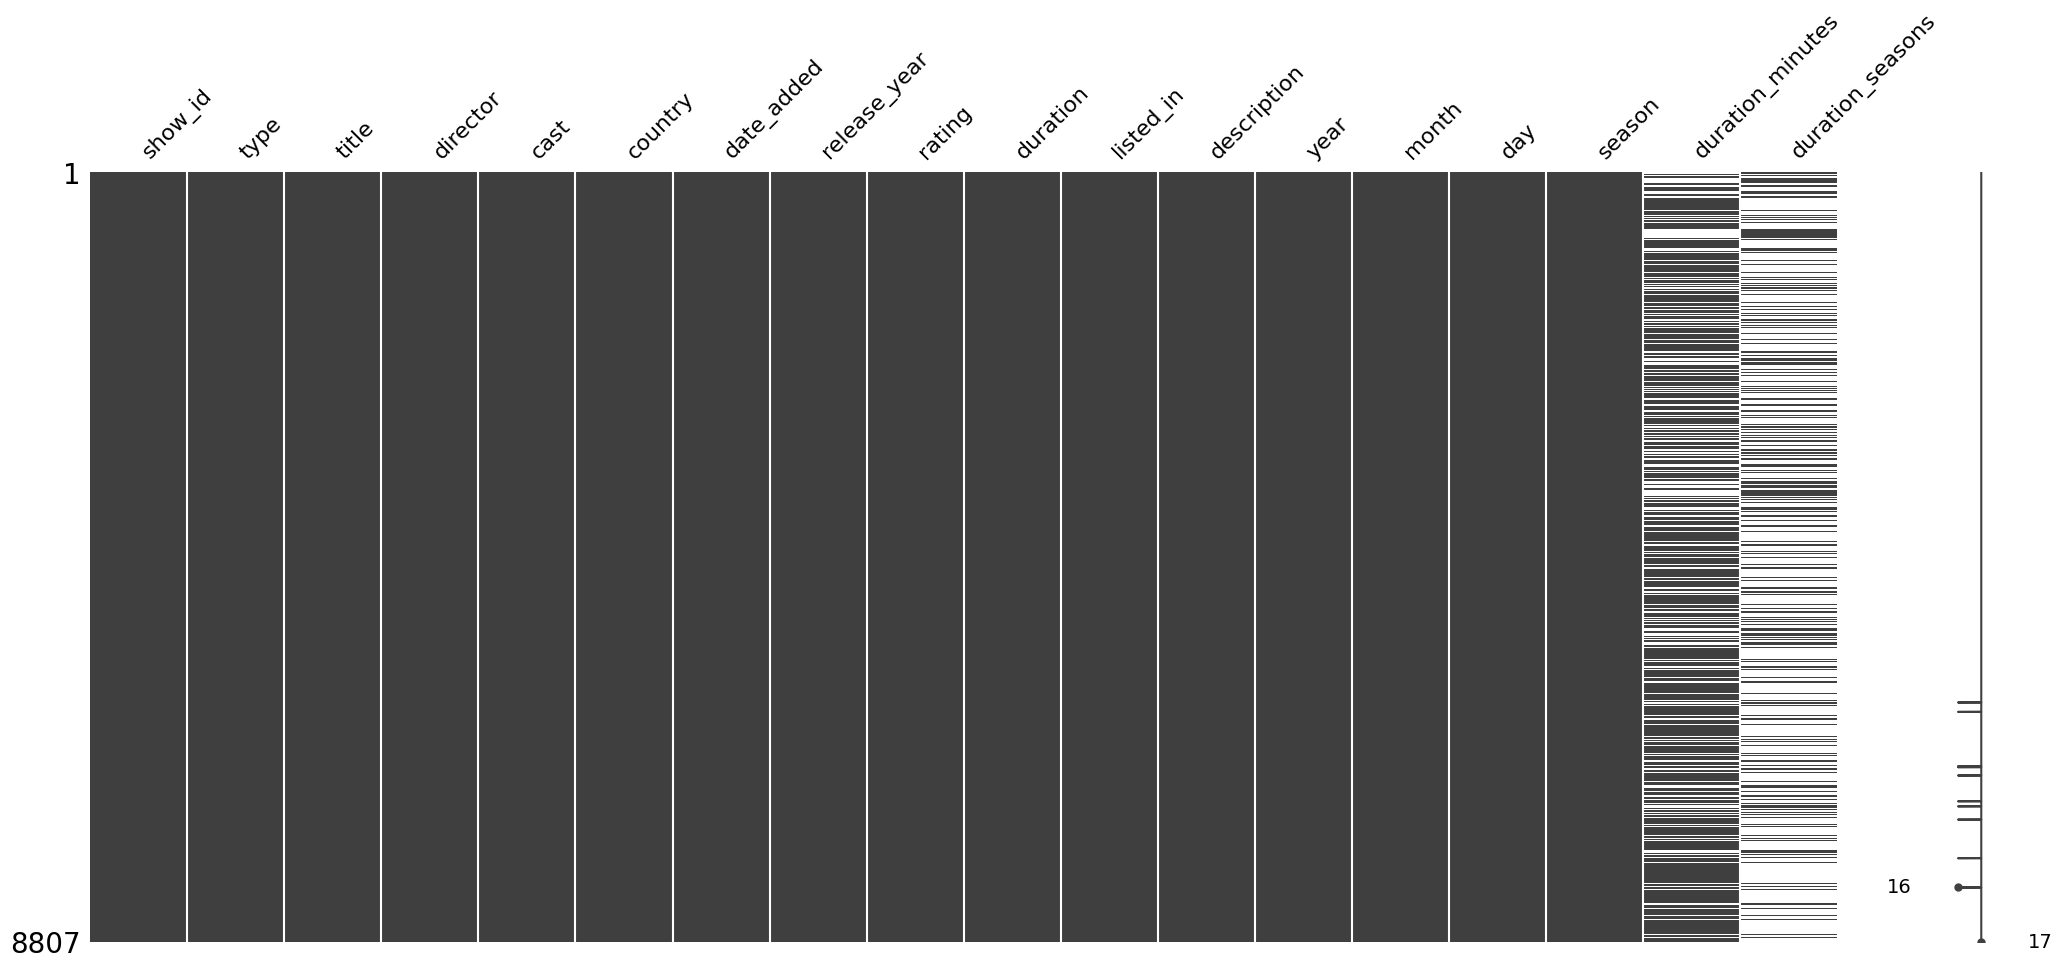

In [45]:
import missingno as msno
msno.matrix(df);

In [46]:
flt_mov = [True if i > 0 else False for i in df.loc[:, "duration_minutes"]]
df.loc[flt_mov, :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,25,autumn,90.0,NaN
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,9,24,autumn,91.0,NaN
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,9,24,autumn,125.0,NaN
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,9,24,autumn,104.0,NaN
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,9,23,autumn,127.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,2016,3,9,spring,96.0,NaN
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,11,20,autumn,158.0,NaN
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11,1,autumn,88.0,NaN
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1,11,winter,88.0,NaN


In [47]:
flt_ser = [True if i > 0 else False for i in df.loc[:, "duration_seasons"]]
df.loc[flt_ser, :]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,season,duration_minutes,duration_seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,24,autumn,NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Seasons,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,24,autumn,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Seasons,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,24,autumn,NaN,1.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,24,autumn,NaN,2.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Unknown,2021-09-24,2021,TV-MA,1 Seasons,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021,9,24,autumn,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,Unknown,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018,5,1,spring,NaN,2.0
8796,s8797,TV Show,Yunus Emre,Unknown,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017,1,17,winter,NaN,2.0
8797,s8798,TV Show,Zak Storm,Unknown,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018,9,13,autumn,NaN,3.0
8800,s8801,TV Show,Zindagi Gulzar Hai,Unknown,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,12,15,winter,NaN,1.0


In [ ]:
# Geçici sütunları temizleme
# df = df.drop(columns=['duration_minutes', 'duration_seasons'])